## Twitter Data 
Wrangling and Analyzing <i>" WeRateDog "</i> Tweets

### Gather

> **Dataset will be gathered from three sources:**
<ul>
<li>File upload:The WeRateDogs Twitter archive a csv file uploaded to the Jupyter notebook (data shows dogs' ratings)</li>
<li>Library request:The tweet image predictions TSV will be downloaded using the Requests library and will be writted to image_predictions.tsv (data shows what breed of dog is present in each tweet according to a neural network)</li>
<li>Twitter API: More data about the tweets it self, will be gathered using Twitter API and Python's tweepy library
</li>
</ul>



In [1]:
#import needed packages 
import pandas as pd
import numpy as nmpy
import requests as rq
import tweepy as tpy
import json as jsn
import time 

In [2]:
#read csv uploaded files
Twitter_archive= pd.read_csv('twitter-archive-enhanced.csv')

#view top rows
Twitter_archive.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [3]:
# Download tweet image predictions TSV using the Requests library and write it to image_predictions.tsv
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = rq.get(url)
with open('image_predictions.tsv', mode='wb') as file:
    file.write(response.content)
    
# Import the tweet image predictions TSV file into a DataFrame
img_df = pd.read_csv('image_predictions.tsv', sep='\t')
img_df.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [11]:
#Accessing Twitter API 
consumer_key = 'XXXX'
consumer_secret = 'XXXX'
access_token = 'XXXX'
access_secret = 'XXXX'

auth = tpy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tpy.API(auth, parser=tpy.parsers.JSONParser())

#api = tweepy.API(auth, parser=tweepy.parsers.JSONParser())

In [12]:
# Query Twitter's API for JSON data

#timer starts here 
start = time.time()

#match to each Tweet ID from the archive
tweet_ids = img_df.tweet_id.values

tweets_data = []
tweet_success = []
tweet_failure = []

for tweet_id in tweet_ids:
        try:
            data = api.get_status(tweet_id, tweet_mode='extended', 
                                  wait_on_rate_limit = True, 
                                  wait_on_rate_limit_notify = True)
            tweets_data.append(data)
            tweet_success.append(tweet_id)
        except:
            tweet_failure.append(tweet_id)
            print(tweet_id)

#timer stops here             
end = time.time()

print(end - start)

680055455951884288
Rate limit reached. Sleeping for: 731
Rate limit reached. Sleeping for: 805
754011816964026368
759566828574212096
771004394259247104
779123168116150273
Rate limit reached. Sleeping for: 807
802247111496568832
829374341691346946
837012587749474308
837366284874571778
842892208864923648
844704788403113984
851953902622658560
861769973181624320
872261713294495745
873697596434513921
Rate limit reached. Sleeping for: 805
888202515573088257
3556.8145480155945


In [4]:
# save data to tweet_json.txt
with open('tweets_json.txt', mode = 'w') as file:
     jsn.dump(tweets_data, file)


In [4]:
#identify information of interest from JSON dictionaries in txt file
#and put it in a dataframe called tweet JSON
my_demo_list = []
with open('tweets_json.txt', encoding='utf-8') as json_file:  
    all_data = jsn.load(json_file)
    for each_dictionary in all_data:
        tweet_id = each_dictionary['id']
        whole_tweet = each_dictionary['full_text']
        only_url = whole_tweet[whole_tweet.find('https'):]
        favorite_count = each_dictionary['favorite_count']
        retweet_count = each_dictionary['retweet_count']
        followers_count = each_dictionary['user']['followers_count']
        friends_count = each_dictionary['user']['friends_count']
        whole_source = each_dictionary['source']
        only_device = whole_source[whole_source.find('rel="nofollow">') + 15:-4]
        source = only_device
        retweeted_status = each_dictionary['retweeted_status'] = each_dictionary.get('retweeted_status', 'Original tweet')
        if retweeted_status == 'Original tweet':
            url = only_url
        else:
            retweeted_status = 'This is a retweet'
            url = 'This is a retweet'

        my_demo_list.append({'tweet_id': str(tweet_id),
                             'favorite_count': int(favorite_count),
                             'retweet_count': int(retweet_count),
                             'followers_count': int(followers_count),
                             'friends_count': int(friends_count),
                             'url': url,
                             'source': source,
                             'retweeted_status': retweeted_status,
                            })
        tweet_json = pd.DataFrame(my_demo_list, columns = ['tweet_id', 'favorite_count','retweet_count', 
                                                           'followers_count', 'friends_count','source', 
                                                           'retweeted_status', 'url'])

In [5]:
tweet_json.head()

,tweet_id,favorite_count,retweet_count,followers_count,friends_count,source,retweeted_status,url
0,666020888022790149,2349,445,8957529,17,Twitter for iPhone,Original tweet,https://t.co/BLDqew2Ijj
1,666029285002620928,117,41,8957529,17,Twitter for iPhone,Original tweet,https://t.co/r7mOb2m0UI
2,666033412701032449,107,39,8957529,17,Twitter for iPhone,Original tweet,https://t.co/y671yMhoiR
3,666044226329800704,261,122,8957529,17,Twitter for iPhone,Original tweet,https://t.co/DWnyCjf2mx
4,666049248165822465,94,38,8957529,17,Twitter for iPhone,Original tweet,https://t.co/4B7cOc1EDq


In [6]:
# Make a copy of the tables before cleaning
arc_df = Twitter_archive.copy()
ig_df = img_df.copy()
json_df = tweet_json.copy()


### Assess


#### Visual assessment

In [7]:
arc_df

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,13,10,None,None,None,None,None
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,None,None,None,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,13,10,None,None,None,None,None
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,None,None,None,None
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,None,None,None


In [8]:
#CODE: Assessing duplicates 
sum(arc_df['tweet_id'].duplicated())

0

In [67]:
img_df.head(5)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [68]:
img_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [9]:
#CODE: Assessing duplicates
sum(img_df.jpg_url.duplicated())


66

> **Quality Issues (Twitter Archive Data)**
<ul>
<li>Validity: Fix rating_denominators which have values different than 10</li>
<li>Validity: Fix naming issue, some dogs have 'None' as a name, or 'a', or 'an'</li>
<li> Remove retweets and keep original tweets only </li>
<li> Delete unnecessary columns </li>
</ul>

> **Quality Issues (Image Prediction Data)**
<ul>
<li> Drop duplicated entries (JPG_URL)</li>
<li> Only one column for prediction and one column for confidence level </li>
<li> Delete unnecessary columns </li>
</ul>

> **Quality Issues (Jason Data)**
<ul>
<li> Keep original tweets only</li>
</ul>


> **Tidiness Issues**
<ul>
<li> Change tweet_id to type int64</li>
<li> Combine all table into one dataset</li>
<li> Dog stages should be a single column </li>
</ul>



In [10]:
#CODE: Removing Replies and Retweets
arc_df= arc_df[Twitter_archive.in_reply_to_status_id .isnull()]

In [11]:
#Test
arc_df

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,13,10,None,None,None,None,None
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,None,None,None,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,13,10,None,None,None,None,None
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,None,None,None,None
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,None,None,None


### Clean

#### Twitter Archive

In [12]:
#CODE: remove unnecessary columns 
arc_df=arc_df.drop(['retweeted_status_id', 'retweeted_status_user_id','retweeted_status_timestamp','in_reply_to_status_id','in_reply_to_user_id'], axis=1)

In [13]:
#Test
arc_df

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
5,891087950875897856,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,https://twitter.com/dog_rates/status/891087950...,13,10,None,None,None,None,None
6,890971913173991426,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,None,None,None,None
7,890729181411237888,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,https://twitter.com/dog_rates/status/890729181...,13,10,None,None,None,None,None
8,890609185150312448,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,None,None,None,None
9,890240255349198849,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,None,None,None


In [14]:
#CODE: Make all denominator values equal to 10
arc_df.loc[arc_df['rating_denominator'] == 10]

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
5,891087950875897856,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,https://twitter.com/dog_rates/status/891087950...,13,10,None,None,None,None,None
6,890971913173991426,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,None,None,None,None
7,890729181411237888,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,https://twitter.com/dog_rates/status/890729181...,13,10,None,None,None,None,None
8,890609185150312448,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,None,None,None,None
9,890240255349198849,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,None,None,None


In [15]:
#CODE: Extract  text from 4 columns into one new dog_type colunn
arc_df['dog_size'] = arc_df['text'].str.extract('(doggo|floofer|pupper|puppo)')


In [16]:
#Test
arc_df.head(10)

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,dog_size
0,892420643555336193,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None,NaN
1,892177421306343426,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None,NaN
2,891815181378084864,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None,NaN
3,891689557279858688,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None,NaN
4,891327558926688256,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None,NaN
5,891087950875897856,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,https://twitter.com/dog_rates/status/891087950...,13,10,None,None,None,None,None,NaN
6,890971913173991426,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,None,None,None,None,NaN
7,890729181411237888,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,https://twitter.com/dog_rates/status/890729181...,13,10,None,None,None,None,None,NaN
8,890609185150312448,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,None,None,None,None,NaN
9,890240255349198849,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,None,None,None,doggo


In [17]:
#CODE: Drop uncessary cols
arc_df = arc_df.drop(['doggo','floofer','pupper','puppo'], 1)
#Test
arc_df

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_size
0,892420643555336193,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,NaN
1,892177421306343426,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,NaN
2,891815181378084864,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,NaN
3,891689557279858688,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,NaN
4,891327558926688256,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,NaN
5,891087950875897856,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,https://twitter.com/dog_rates/status/891087950...,13,10,None,NaN
6,890971913173991426,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,NaN
7,890729181411237888,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,https://twitter.com/dog_rates/status/890729181...,13,10,None,NaN
8,890609185150312448,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,NaN
9,890240255349198849,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo


In [18]:
#CODE: Correct naming issue
arc_df['name'] = arc_df['name'].str.replace('^[a-z]+', 'None')

In [19]:
#Test
arc_df.name.value_counts()

None              777
Charlie            12
Lucy               11
Cooper             11
Oliver             11
Lola               10
Tucker             10
Penny              10
Winston             9
Bo                  9
Sadie               8
Buddy               7
Toby                7
Bailey              7
Daisy               7
Bella               6
Rusty               6
Stanley             6
Jack                6
Dave                6
Jax                 6
Scout               6
Milo                6
Leo                 6
Koda                6
Oscar               6
Chester             5
Sammy               5
Bentley             5
Phil                5
                 ... 
Clarq               1
Nigel               1
Kollin              1
O                   1
Jomathan            1
Chubbs              1
Ferg                1
Dug                 1
Schnozz             1
Harrison            1
Tove                1
Longfellow          1
Aubie               1
Vixen               1
Joshwa    

#### Image Prediction Data

In [23]:
#CODE: Drop duplicated rows
ig_df['jpg_url'].drop_duplicates(inplace=True)

In [24]:
#Test
ig_df['jpg_url'].value_counts()

https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg                                            1
https://pbs.twimg.com/media/CrTsCPHWYAANdzC.jpg                                            1
https://pbs.twimg.com/media/Ccl0-HVVAAAf8aK.jpg                                            1
https://pbs.twimg.com/media/C-CYWrvWAAU8AXH.jpg                                            1
https://pbs.twimg.com/media/CsPxk85XEAAeMQj.jpg                                            1
https://pbs.twimg.com/media/Co5lf-KW8AAIwJw.jpg                                            1
https://pbs.twimg.com/media/CYP62A6WkAAOnL4.jpg                                            1
https://pbs.twimg.com/media/CVb39_1XIAAMoIv.jpg                                            1
https://pbs.twimg.com/media/CZNtgWhWkAAbq3W.jpg                                            1
https://pbs.twimg.com/media/Cd1i8qvUkAE-Jlr.jpg                                            1
https://pbs.twimg.com/media/CWoXOfSUAAA4u8g.jpg                       

In [25]:
#CODE:True predictions (p1, p2 or p3) will be stored in two list 
dog_type = []
confidence_list = []

#Creating a function to capture the dog type and confidence level
def image(ig_df):
    if ig_df['p1_dog'] == True:
        dog_type.append(ig_df['p1'])
        confidence_list.append(ig_df['p1_conf'])
    elif ig_df['p2_dog'] == True:
        dog_type.append(ig_df['p2'])
        confidence_list.append(ig_df['p2_conf'])
    elif ig_df['p3_dog'] == True:
        dog_type.append(ig_df['p3'])
        confidence_list.append(ig_df['p3_conf'])
    else:
        dog_type.append('Error')
        confidence_list.append('Error')

#series objects having index the image_prediction_clean column        
ig_df.apply(image, axis=1)

#create new columns
ig_df['dog_type'] = dog_type
ig_df['confidence_list'] = confidence_list

In [26]:
#Test
ig_df.head(10)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,dog_type,confidence_list
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True,Welsh_springer_spaniel,0.465074
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True,redbone,0.506826
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True,German_shepherd,0.596461
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True,Rhodesian_ridgeback,0.408143
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True,miniature_pinscher,0.560311
5,666050758794694657,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,1,Bernese_mountain_dog,0.651137,True,English_springer,0.263788,True,Greater_Swiss_Mountain_dog,0.016199,True,Bernese_mountain_dog,0.651137
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,0.045885,False,terrapin,0.017885,False,Error,Error
7,666055525042405380,https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg,1,chow,0.692517,True,Tibetan_mastiff,0.058279,True,fur_coat,0.054449,False,chow,0.692517
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,shopping_cart,0.962465,False,shopping_basket,0.014594,False,golden_retriever,0.007959,True,golden_retriever,0.00795896
9,666058600524156928,https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg,1,miniature_poodle,0.201493,True,komondor,0.192305,True,soft-coated_wheaten_terrier,0.082086,True,miniature_poodle,0.201493


In [27]:
#CODE: drop rows that have'error' predictions 
ig_df = ig_df[ig_df['dog_type'] != 'Error']

In [29]:
#Test
ig_df.head(10)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,dog_type,confidence_list
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True,Welsh_springer_spaniel,0.465074
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True,redbone,0.506826
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True,German_shepherd,0.596461
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True,Rhodesian_ridgeback,0.408143
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True,miniature_pinscher,0.560311
5,666050758794694657,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,1,Bernese_mountain_dog,0.651137,True,English_springer,0.263788,True,Greater_Swiss_Mountain_dog,0.016199,True,Bernese_mountain_dog,0.651137
7,666055525042405380,https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg,1,chow,0.692517,True,Tibetan_mastiff,0.058279,True,fur_coat,0.054449,False,chow,0.692517
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,shopping_cart,0.962465,False,shopping_basket,0.014594,False,golden_retriever,0.007959,True,golden_retriever,0.00795896
9,666058600524156928,https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg,1,miniature_poodle,0.201493,True,komondor,0.192305,True,soft-coated_wheaten_terrier,0.082086,True,miniature_poodle,0.201493
10,666063827256086533,https://pbs.twimg.com/media/CT5Vg_wXIAAXfnj.jpg,1,golden_retriever,0.775930,True,Tibetan_mastiff,0.093718,True,Labrador_retriever,0.072427,True,golden_retriever,0.77593


In [30]:
#CODE: Delete unnecessary columns of predictions 
ig_df = ig_df.drop(['img_num','p1','p1_conf','p1_dog','p2','p2_conf','p2_dog','p3','p3_conf','p3_dog'], 1)

In [31]:
#Testing
ig_df.head(10)

,tweet_id,jpg_url,dog_type,confidence_list
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,Welsh_springer_spaniel,0.465074
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,redbone,0.506826
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,German_shepherd,0.596461
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,Rhodesian_ridgeback,0.408143
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,miniature_pinscher,0.560311
5,666050758794694657,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,Bernese_mountain_dog,0.651137
7,666055525042405380,https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg,chow,0.692517
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,golden_retriever,0.00795896
9,666058600524156928,https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg,miniature_poodle,0.201493
10,666063827256086533,https://pbs.twimg.com/media/CT5Vg_wXIAAXfnj.jpg,golden_retriever,0.77593


#### Jason Tweets

In [32]:
#CODE: Keeping only original tweets
json_df=json_df[json_df['retweeted_status']!="This is a retweet"]

In [33]:
#Test
json_df['retweeted_status'].unique()

array(['Original tweet'], dtype=object)

#### Tidiness

In [34]:
#CODE: Cahnge dtypes of tweet if for all three datasets 
json_df['tweet_id'].astype('int64').dtypes
arc_df['tweet_id'].astype('int64').dtypes
ig_df['tweet_id'].astype('int64').dtypes

dtype('int64')

In [35]:
#CODE: Merging twitter archive and image df in a one dataset 
dfs = pd.merge(arc_df, 
                      ig_df, 
                      how = 'left', on = ['tweet_id'])


In [36]:
#Test
dfs

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_size,jpg_url,dog_type,confidence_list
0,892420643555336193,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,NaN,NaN,NaN,NaN
1,892177421306343426,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,NaN,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,Chihuahua,0.323581
2,891815181378084864,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,NaN,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,Chihuahua,0.716012
3,891689557279858688,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,NaN,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,Labrador_retriever,0.168086
4,891327558926688256,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,NaN,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,basset,0.555712
5,891087950875897856,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,https://twitter.com/dog_rates/status/891087950...,13,10,None,NaN,https://pbs.twimg.com/media/DF3HwyEWsAABqE6.jpg,Chesapeake_Bay_retriever,0.425595
6,890971913173991426,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,NaN,https://pbs.twimg.com/media/DF1eOmZXUAALUcq.jpg,Appenzeller,0.341703
7,890729181411237888,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,https://twitter.com/dog_rates/status/890729181...,13,10,None,NaN,https://pbs.twimg.com/media/DFyBahAVwAAhUTd.jpg,Pomeranian,0.566142
8,890609185150312448,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,NaN,https://pbs.twimg.com/media/DFwUU__XcAEpyXI.jpg,Irish_terrier,0.487574
9,890240255349198849,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,https://pbs.twimg.com/media/DFrEyVuW0AAO3t9.jpg,Pembroke,0.511319


In [37]:
CODE: dfs['tweet_id'].astype('int64').dtypes

In [40]:
#CODE:convert tweet_it for both dataframes to string to merge
json_df['tweet_id'] = json_df['tweet_id'].astype(str)
dfs['tweet_id'] = dfs['tweet_id'].astype(str)


In [41]:
#CODE: Add jason file to dfs
dfs_1 = pd.merge(dfs, 
                     json_df, 
                      how = 'left', on = ['tweet_id'])

In [42]:
#Test
dfs_1

,tweet_id,timestamp,source_x,text,expanded_urls,rating_numerator,rating_denominator,name,dog_size,jpg_url,dog_type,confidence_list,favorite_count,retweet_count,followers_count,friends_count,source_y,retweeted_status,url
0,892420643555336193,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,NaN,NaN,NaN,NaN,35109.0,7400.0,8957512.0,17.0,Twitter for iPhone,Original tweet,https://t.co/MgUWQ76dJU
1,892177421306343426,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,NaN,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,Chihuahua,0.323581,30386.0,5510.0,8957512.0,17.0,Twitter for iPhone,Original tweet,https://t.co/0Xxu71qeIV
2,891815181378084864,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,NaN,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,Chihuahua,0.716012,22847.0,3638.0,8957512.0,17.0,Twitter for iPhone,Original tweet,https://t.co/wUnZnhtVJB
3,891689557279858688,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,NaN,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,Labrador_retriever,0.168086,38384.0,7576.0,8957512.0,17.0,Twitter for iPhone,Original tweet,https://t.co/tD36da7qLQ
4,891327558926688256,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,NaN,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,basset,0.555712,36645.0,8157.0,8957512.0,17.0,Twitter for iPhone,Original tweet,https://t.co/AtUZn91f7f
5,891087950875897856,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,https://twitter.com/dog_rates/status/891087950...,13,10,None,NaN,https://pbs.twimg.com/media/DF3HwyEWsAABqE6.jpg,Chesapeake_Bay_retriever,0.425595,18483.0,2739.0,8957512.0,17.0,Twitter for iPhone,Original tweet,https://t.co/kQ04fDDRmh
6,890971913173991426,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,NaN,https://pbs.twimg.com/media/DF1eOmZXUAALUcq.jpg,Appenzeller,0.341703,10745.0,1771.0,8957512.0,17.0,Twitter for iPhone,Original tweet,https://t.co/Zr4hWfAs1H https://t.co/tVJBRMnhxl
7,890729181411237888,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,https://twitter.com/dog_rates/status/890729181...,13,10,None,NaN,https://pbs.twimg.com/media/DFyBahAVwAAhUTd.jpg,Pomeranian,0.566142,59118.0,16561.0,8957512.0,17.0,Twitter for iPhone,Original tweet,https://t.co/v0nONBcwxq
8,890609185150312448,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,NaN,https://pbs.twimg.com/media/DFwUU__XcAEpyXI.jpg,Irish_terrier,0.487574,25434.0,3787.0,8957512.0,17.0,Twitter for iPhone,Original tweet,https://t.co/9TwLuAGH0b
9,890240255349198849,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,https://pbs.twimg.com/media/DFrEyVuW0AAO3t9.jpg,Pembroke,0.511319,29030.0,6421.0,8957512.0,17.0,Twitter for iPhone,Original tweet,https://t.co/t1bfwz5S2A


In [43]:
dfs_1['tweet_id']=dfs_1['tweet_id'].astype(int)

In [44]:
#CODE: Save a copy of combined dataset 
dfs_1.to_csv('twitter_archive_master.csv', 
                 index=False, encoding = 'utf-8')


In [45]:
#Test
dfs_1.head()

,tweet_id,timestamp,source_x,text,expanded_urls,rating_numerator,rating_denominator,name,dog_size,jpg_url,dog_type,confidence_list,favorite_count,retweet_count,followers_count,friends_count,source_y,retweeted_status,url
0,892420643555336193,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,NaN,NaN,NaN,NaN,35109.0,7400.0,8957512.0,17.0,Twitter for iPhone,Original tweet,https://t.co/MgUWQ76dJU
1,892177421306343426,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,NaN,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,Chihuahua,0.323581,30386.0,5510.0,8957512.0,17.0,Twitter for iPhone,Original tweet,https://t.co/0Xxu71qeIV
2,891815181378084864,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,NaN,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,Chihuahua,0.716012,22847.0,3638.0,8957512.0,17.0,Twitter for iPhone,Original tweet,https://t.co/wUnZnhtVJB
3,891689557279858688,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,NaN,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,Labrador_retriever,0.168086,38384.0,7576.0,8957512.0,17.0,Twitter for iPhone,Original tweet,https://t.co/tD36da7qLQ
4,891327558926688256,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,NaN,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,basset,0.555712,36645.0,8157.0,8957512.0,17.0,Twitter for iPhone,Original tweet,https://t.co/AtUZn91f7f


## Findings and Insights

Dog type with the highet ranking is : 

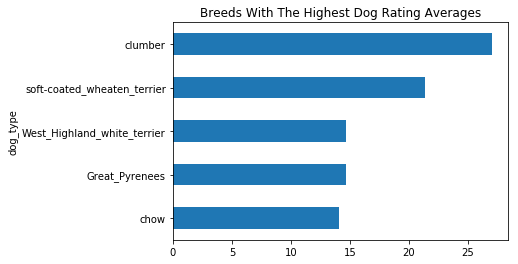

In [108]:
#average of rates by dog type
mean_rate = dfs_1.groupby('dog_type').mean()
mean_rate_sorted = mean_rate['rating_numerator'].sort_values()
top_rated_mean=mean_rate_sorted.tail()
top_rated_mean.plot(kind = 'barh',color='tab:blue',title='Breeds With The Highest Dog Rating Averages');

In [109]:
#sum of retweet counts by dog type & top breed by engagement 
dfs_1['Engagement'] = dfs_1.groupby(['dog_type'])['retweet_count'].transform('sum');
dfs_1_x=dfs_1.drop_duplicates(subset=['dog_type'])
dfs_1_x.nlargest(5,'Engagement')


,tweet_id,timestamp,source_x,text,expanded_urls,rating_numerator,rating_denominator,name,dog_size,jpg_url,dog_type,confidence_list,favorite_count,retweet_count,followers_count,friends_count,source_y,retweeted_status,url,Engagement
14,889531135344209921,2017-07-24 17:02:04 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Stuart. He's sporting his favorite fan...,https://twitter.com/dog_rates/status/889531135...,13,10,Stuart,puppo,https://pbs.twimg.com/media/DFg_2PVW0AEHN3p.jpg,golden_retriever,0.953442,13847.0,1980.0,8957512.0,17.0,Twitter for iPhone,Original tweet,https://t.co/y70o6h3isq,501332.0
3,891689557279858688,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,NaN,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,Labrador_retriever,0.168086,38384.0,7576.0,8957512.0,17.0,Twitter for iPhone,Original tweet,https://t.co/tD36da7qLQ,333679.0
9,890240255349198849,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,https://pbs.twimg.com/media/DFrEyVuW0AAO3t9.jpg,Pembroke,0.511319,29030.0,6421.0,8957512.0,17.0,Twitter for iPhone,Original tweet,https://t.co/t1bfwz5S2A,248861.0
1,892177421306343426,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,NaN,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,Chihuahua,0.323581,30386.0,5510.0,8957512.0,17.0,Twitter for iPhone,Original tweet,https://t.co/0Xxu71qeIV,221231.0
10,890006608113172480,2017-07-26 00:31:25 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Koda. He is a South Australian decksha...,https://twitter.com/dog_rates/status/890006608...,13,10,Koda,NaN,https://pbs.twimg.com/media/DFnwSY4WAAAMliS.jpg,Samoyed,0.957979,28008.0,6442.0,8957512.0,17.0,Twitter for iPhone,Original tweet,https://t.co/dVPW0B0Mme,163786.0


In [110]:
#Most popular dog names 
pop_counts=dfs_1['name'].value_counts()
pop_counts

None        777
Charlie      12
Lucy         11
Cooper       11
Oliver       11
Tucker       10
Penny        10
Lola         10
Bo            9
Winston       9
Sadie         8
Buddy         7
Bailey        7
Toby          7
Daisy         7
Rusty         6
Stanley       6
Jax           6
Oscar         6
Leo           6
Milo          6
Jack          6
Scout         6
Koda          6
Bella         6
Dave          6
Larry         5
Chester       5
Phil          5
Sunny         5
           ... 
Norman        1
Kawhi         1
Amélie        1
Sage          1
Tito          1
Divine        1
Harnold       1
Goliath       1
Brudge        1
Milky         1
Cermet        1
Dook          1
Bodie         1
Toffee        1
Stella        1
Barney        1
Napolean      1
Sailor        1
Dudley        1
Grey          1
Rascal        1
Mo            1
Lugan         1
Flurpson      1
Bobble        1
Tayzie        1
Tupawc        1
Keet          1
Skittle       1
Peanut        1
Name: name, Length: 931,

In [111]:
#average of rates by dog type
max_rate = dfs_1.groupby('dog_type').max()
max_rate = max_rate['rating_numerator'].sort_values()
max_rate

dog_type
Japanese_spaniel                 5
Scotch_terrier                   9
Ibizan_hound                    10
Walker_hound                    10
Brabancon_griffon               10
groenendael                     10
EntleBucher                     11
Sussex_spaniel                  11
Welsh_springer_spaniel          11
Irish_wolfhound                 11
Saint_Bernard                   12
Rhodesian_ridgeback             12
Norwich_terrier                 12
Maltese_dog                     12
Tibetan_terrier                 12
Lhasa                           12
Weimaraner                      12
Scottish_deerhound              12
basenji                         12
bull_mastiff                    12
cairn                           12
keeshond                        12
komondor                        12
miniature_pinscher              12
miniature_poodle                12
miniature_schnauzer             12
papillon                        12
redbone                         12
silky_terri

In [112]:
i = dfs_1[(dfs_1.rating_numerator == 165)]
i

,tweet_id,timestamp,source_x,text,expanded_urls,rating_numerator,rating_denominator,name,dog_size,jpg_url,dog_type,confidence_list,favorite_count,retweet_count,followers_count,friends_count,source_y,retweeted_status,url,Engagement
869,758467244762497024,2016-07-28 01:00:57 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Why does this never happen at my front door......,https://twitter.com/dog_rates/status/758467244...,165,150,None,NaN,https://pbs.twimg.com/ext_tw_video_thumb/75846...,Labrador_retriever,0.436377,4668.0,2152.0,8957510.0,17.0,Twitter for iPhone,Original tweet,https://t.co/HmwrdfEfUE,333679.0


In [113]:
#The dog with the highest rating 
print(dfs_1.loc[dfs_1.rating_numerator == 165,'url'])


869    https://t.co/HmwrdfEfUE
Name: url, dtype: object


In [114]:
#The dog with the lowest rating 
z = dfs_1.loc[(dfs_1.dog_type == 'Japanese_spaniel','url')]
z

1736    https://t.co/IoLRvF0Kak
Name: url, dtype: object

In [120]:
#max rates by dog size
max_rate_z = dfs_1.groupby('dog_size').max()
max_rate_z = max_rate_z['rating_numerator'].sort_values()
max_rate_z

dog_size
floofer     13
puppo       14
pupper     121
doggo      204
Name: rating_numerator, dtype: int64